# Time series comparison (UNGL, PANGA)

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import gpstools as gps

import warnings; warnings.simplefilter('ignore')

/Users/scott/miniconda3/envs/forge2017/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/scott/Documents/GitHub/gpstools/data/ungl


In [2]:
plt.style.use('seaborn-white')
#Non-interactive figures:
%matplotlib inline
# Interactive!
#%matplotlib notebook
#%qtconsole

# Load time series

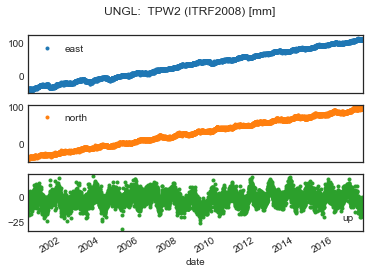

In [3]:
# We'll use station TPW2
station = 'TPW2'
ref1 = 'ITRF2008'
# Reference frame is ITRF2008
# Download data
gps.io.panga.download_data(station,overwrite=True)
# Load the timeseries as pandas dataframe
df1 = gps.io.panga.load_panga(station)
title1 = 'UNGL:  {} ({}) [mm]'.format(station, ref1)
axes = df1.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=title1)

Overwriting TPW2


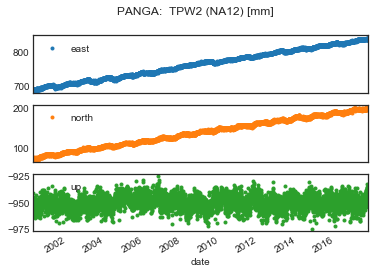

In [4]:
# Load UNGL
ref2= 'NA12'
# Download data
tenv3 = gps.io.ungl.download_data(station, ref2, overwrite=True)
df2 = gps.io.ungl.load_tenv3(tenv3)
title2 = 'PANGA:  {} ({}) [mm]'.format(station, ref2)
axes = df2.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=title2)

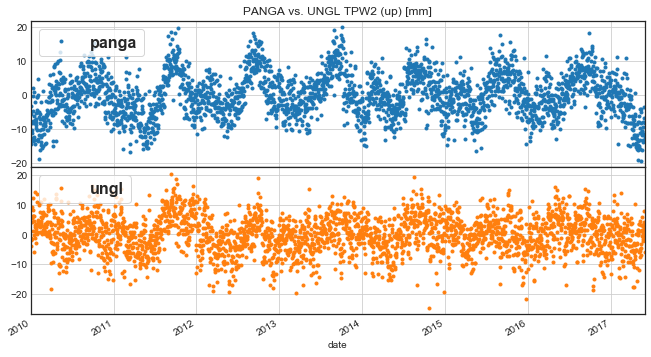

In [5]:
# Subtract mean from component to compare on same plot
#comp = 'east'
#comp = 'north'
comp = 'up'

# crop to target date range
tmp1 = df1['2010/01/01':'2017/06/01']#specific time range
tmp2 = df2['2010/01/01':'2017/06/01']

# subtract mean
pangaData = tmp1[comp] - tmp1[comp].mean()
unglData = tmp2[comp] - tmp2[comp].mean()

df = pd.DataFrame(dict(panga=pangaData)) 
df['ungl'] = unglData    
axes = df.plot(subplots=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    #ax.legend(loc='upper left', frameon=True, fontsize='large')
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp))
#print(df.describe())


Rate [mm/yr]=9.098591855851716
Rate [mm/yr]=8.600864154864505


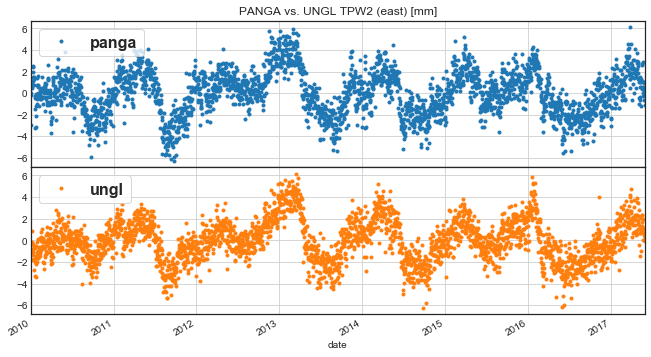

In [6]:
# Subtract mean from component to compare on same plot
comp = 'east'
#comp = 'north'
#comp = 'up'

# crop to target date range
tmp1 = df1['2010/01/01':'2017/06/01']#specific time range
tmp2 = df2['2010/01/01':'2017/06/01']

# subtract mean
#pangaData = df1[comp]-df1[comp].mean()
#unglData = df2[comp]-df2[comp].mean()

# linear detrend 
# Ensure no nans in time series
tmp1 = tmp1.dropna()
tmp1 = gps.analysis.detrend(tmp1, comp)
pangaData = tmp1['detrend']
tmp2 = gps.analysis.detrend(tmp2, comp)
unglData = tmp2['detrend']

df = pd.DataFrame(dict(panga=pangaData)) 
df['ungl'] = unglData

axes = df.plot(subplots=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp))
#print(df.describe())



Rate [mm/yr]=7.396542796555013
Rate [mm/yr]=6.671898691051421


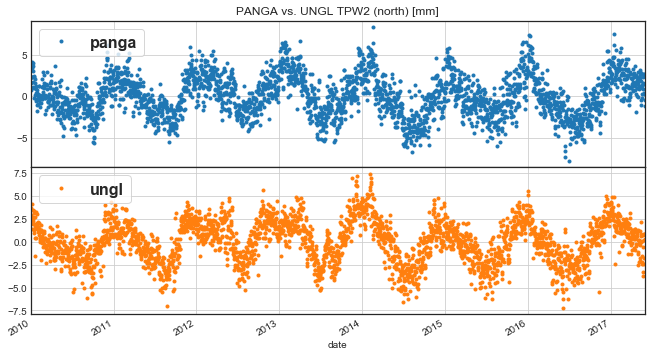

In [7]:
# Subtract mean from component to compare on same plot
#comp = 'east'
comp = 'north'
#comp = 'up'

# crop to target date range
tmp1 = df1['2010/01/01':'2017/06/01']#specific time range
tmp2 = df2['2010/01/01':'2017/06/01']

# subtract mean
#pangaData = df1[comp]-df1[comp].mean()
#unglData = df2[comp]-df2[comp].mean()

# linear detrend 
# Ensure no nans in time series
tmp1 = tmp1.dropna()
tmp1 = gps.analysis.detrend(tmp1, comp)
pangaData = tmp1['detrend']
tmp2 = gps.analysis.detrend(tmp2, comp)
unglData = tmp2['detrend']

df = pd.DataFrame(dict(panga=pangaData)) 
df['ungl'] = unglData

axes = df.plot(subplots=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp))
#print(df.describe())

